In [1]:
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import coremltools
from scipy import stats
import os
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.utils import np_utils
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)

keras version  2.0.4


In [132]:
Goal4 = pd.read_excel('Goal4.xlsx')

In [133]:
Goal4.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill',
       'Units'],
      dtype='object')

In [134]:
#Country of focus
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [135]:
for i,j in enumerate(countries):
    print(i,j)

0 Afghanistan
1 Albania
2 Algeria
3 Angola
4 Antigua and Barbuda
5 Argentina
6 Armenia
7 Azerbaijan
8 Bangladesh
9 Belarus
10 Belize
11 Benin
12 Bhutan
13 Bolivia
14 Bosnia and Herzegovina
15 Botswana
16 Brazil
17 Bulgaria
18 Burkina Faso
19 Burundi
20 Cabo Verde
21 Cambodia
22 Cameroon
23 Central African Republic
24 Chad
25 Chile
26 China
27 Colombia
28 Comoros
29 Congo
30 Congo, Democratic Republic
31 Costa Rica
32 Croatia
33 Côte d'Ivoire
34 Djibouti
35 Dominica
36 Dominican Republic
37 Ecuador
38 Egypt
39 El Salvador
40 Equatorial Guinea
41 Eritrea
42 Eswatini
43 Ethiopia
44 Fiji
45 Gabon
46 Gambia
47 Georgia
48 Ghana
49 Grenada
50 Guatemala
51 Guinea
52 Guinea-Bissau
53 Guyana
54 Haiti
55 Honduras
56 India
57 Indonesia
58 Iran (Islamic Republic of)
59 Iraq
60 Jamaica
61 Jordan
62 Kazakhstan
63 Kenya
64 Kiribati
65 Kosovo
66 Kyrgyzstan
67 Lao People's Democratic Republic
68 Lebanon
69 Lesotho
70 Liberia
71 Libya
72 Madagascar
73 Malawi
74 Malaysia
75 Maldives
76 Mali
77 Marshall Is

In [6]:
t1=Goal4[Goal4['Target']=='4.1']
t2=Goal4[Goal4['Target']=='4.2']
t3=Goal4[Goal4['Target']=='4.3']
t4=Goal4[Goal4['Target']=='4.4']
t5=Goal4[Goal4['Target']=='4.5']
t6=Goal4[Goal4['Target']=='4.6']
t7=Goal4[Goal4['Target']=='4.a']
t8=Goal4[Goal4['Target']=='4.b']
t9=Goal4[Goal4['Target']=='4.c']

In [7]:
T=[t1, t2, t3, t4, t4, t5, t6, t7, t8, t9]
for each in T:
    print(each.shape)

(80340, 26)
(6127, 26)
(1009, 26)
(5929, 26)
(5929, 26)
(71763, 26)
(237, 26)
(10546, 26)
(2276, 26)
(13535, 26)


In [10]:
t3=t3.drop(columns=["Goal", "Target", "Indicator", "SeriesCode", "SeriesDescription", "GeoAreaCode", "TimeCoverage", "UpperBound", "LowerBound", "BasePeriod", "GeoInfoUrl", "FootNote", "Quantile", "Location", "Education level", "Nature","Type of skill", "Units" ])

In [11]:
dd=pd.read_csv("new_data.csv")

/home/arshiyakhan/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,9,17,19,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
t3["UpperBound"]=dd["UpperBound"]
t3["LowerBound"]=dd["LowerBound"]

In [17]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 86467 to 87475
Data columns (total 9 columns):
GeoAreaName       1009 non-null object
TimePeriod        1009 non-null int64
Value             1009 non-null float64
Time_Detail       1009 non-null object
Source            1009 non-null object
Reporting Type    1009 non-null object
Sex               1009 non-null object
UpperBound        1009 non-null float64
LowerBound        1009 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 78.8+ KB


In [14]:
t3.shape

(1009, 10)

In [ ]:
t3['Age']

In [16]:
t3=t3.drop(columns=["Age"])

In [18]:
Y=t3['TimePeriod']

In [115]:
LABELS=list(t3['TimePeriod'].unique())
print(LABELS)

[2007, 2008, 2009, 2010, 2013, 2016, 2004, 2011, 2005, 2006, 2012, 2014, 2017, 2015, 2000, 2001, 2002, 2003, 2018]


In [116]:
Y.isnull().sum()

0

In [117]:
LABEL = 'YearEncoded'

In [118]:
le = preprocessing.LabelEncoder()

In [119]:
t3[LABEL] = le.fit_transform(t3['TimePeriod'].values.ravel())

In [120]:
X.shape

(1009, 185)

In [121]:
Y=t3[LABEL]

In [122]:
X=t3
X=X.drop(columns=['TimePeriod'])

In [33]:
dummy_df = pd.get_dummies(X)

In [123]:
X.shape

(1009, 9)

In [124]:
X=dummy_df

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 33)

In [126]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix


In [128]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [129]:
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    756
Name: YearEncoded, dtype: int64
----------------------------------
0   1.0
Name: YearEncoded, dtype: float64


In [130]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    253
Name: YearEncoded, dtype: int64
---------------------------------
0   1.0
Name: YearEncoded, dtype: float64


In [131]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0 

In [54]:
scores = logreg.score(X_test, y_test)

In [55]:
scores

1.0

In [69]:
from sklearn.metrics import *
#import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

In [59]:
print(classification_report(y_train,y_hat_train ))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00         8
          3       1.00      1.00      1.00        12
          4       1.00      1.00      1.00        20
          5       1.00      1.00      1.00        14
          6       1.00      1.00      1.00        12
          7       1.00      1.00      1.00        81
          8       1.00      1.00      1.00        24
          9       1.00      1.00      1.00        30
         10       1.00      1.00      1.00        42
         11       1.00      1.00      1.00       109
         12       1.00      1.00      1.00        70
         13       1.00      1.00      1.00        59
         14       1.00      1.00      1.00        33
         15       1.00      1.00      1.00        41
         16       1.00      1.00      1.00       120
         17       1.00      1.00      1.00   

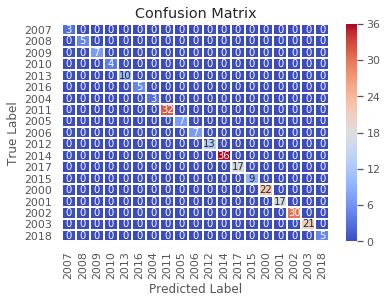

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix,cmap='coolwarm',linecolor='white',linewidths=1,xticklabels=LABELS, yticklabels=LABELS,
annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("confusion.png")

In [81]:
metrics.roc_curve(y_train, y_hat_train)

ValueError: multiclass format is not supported

In [68]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat_test, pos_label=2)

In [74]:
metrics.auc(fpr, tpr)

0.03252032520325199

In [82]:
metrics.print_metric_comparisons(X, y)

AttributeError: module 'sklearn.metrics' has no attribute 'print_metric_comparisons'

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [85]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multiclass format is not supported

In [86]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [90]:
def create_segments_and_labels(x_data, time_steps, step, y_data):
    N_FEATURES=185
    segments = []
    labels=[]
    for i in range(0,len(x_data)-time_steps, step):
        vs=x_data.values[i:i+time_steps]
        #print(vs)
        #print(i)
        label=stats.mode(y_data[i:i+time_steps])[0][0]
        #print(label)
        segments.append([vs])
#        print("label")
        labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.int64).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [100]:
TIME_PERIODS=10
STEP_DISTANCE=5
new_X_train,new_Y_train=create_segments_and_labels(X_train,TIME_PERIODS,STEP_DISTANCE,y_train)

In [101]:
print('new_X_train shape:', new_X_train.shape)
print('new_Y_train shape: ', new_Y_train.shape)
num_values, num_sensors = new_X_train.shape[1], new_X_train.shape[2]
num_classes=len(LABELS)

input_shape = (num_values*num_sensors)
y_train_hot = np_utils.to_categorical(new_Y_train, num_classes)
newest_X_train = new_X_train.reshape(new_X_train.shape[0], input_shape)


new_X_train shape: (150, 10, 185)
new_Y_train shape:  (150,)


In [102]:
new_X_test,new_Y_test=create_segments_and_labels(X_test,TIME_PERIODS,STEP_DISTANCE,y_test)
print('new_X_test shape:', new_X_test.shape)
print('input_shape:', input_shape)
print('new_Y_test shape: ', new_Y_test.shape)

y_test_hot = np_utils.to_categorical(new_Y_test, num_classes)
newest_X_test = new_X_test.reshape(new_X_test.shape[0], input_shape)

new_X_test shape: (49, 10, 185)
input_shape: 1850
new_Y_test shape:  (49,)


In [114]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='showAll_best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=2)]

model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(64, 3, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
#model_m.add(Conv1D(64, 3, activation='relu'))
model_m.add(MaxPooling1D(3))
#model_m.add(Dropout(0.5))
#model.add(Flatten())
#model_m.add(Conv1D(100, 5, activation='relu'))
#model_m.add(Conv1D(32, 3, activation='relu'))
model_m.add(GlobalAveragePooling1D())
#model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
#model_m.add(Dense(num_classes, activation='sigmoid'))
print(model_m.summary())


model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
BATCH_SIZE = 20
EPOCHS = 50
history = model_m.fit(newest_X_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 10, 185)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 8, 64)             35584     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
global_average_pooling1d_9 ( (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 19)                1235      
Total params: 36,819
Trainable params: 36,819
Non-trainable params: 0
_________________________________________________________________
None
Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s - loss: 2.7434 - acc: 0.1667 - 

In [110]:
score = model_m.evaluate(newest_X_test, y_test_hot, verbose=1)
print(score)
y_pred_train = model_m.predict(newest_X_train)
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(new_Y_train, max_y_pred_train))


32/49 [==================>...........] - ETA: 0s[2.3056446386843312, 0.28571428997176035]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1
          4       1.00      0.33      0.50         3
          5       0.00      0.00      0.00         1
          7       0.83      0.83      0.83        30
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         2
         10       1.00      0.43      0.60         7
         11       0.63      0.91      0.74        35
         12       0.59      0.81      0.68        16
         13       0.85      0.79      0.81        14
         14       1.00      0.33      0.50         3
         15       0.00      0.00      0.00         3
         16       0.75      0.78      0.76        27
         17       1.00      0.33      0.50         3

avg / t

/home/arshiyakhan/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


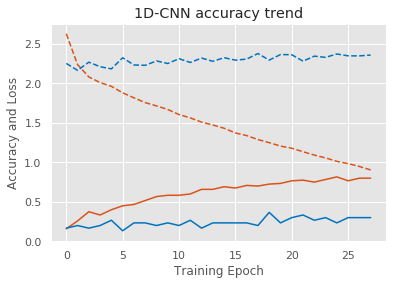

In [111]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], color='#D95319', label='Accuracy of training data')
plt.plot(history.history['val_acc'], color='#0072BD', label='Accuracy of validation data')
plt.plot(history.history['loss'], color='#D95319', linestyle='--', label='Loss of training data')
plt.plot(history.history['val_loss'],color='#0072BD', linestyle='--', label='Loss of validation data')
plt.title('1D-CNN accuracy trend')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
#plt.legend()
plt.savefig("Accuracy_1Dcnn.png")

y_pred_test = model_m.predict(newest_X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test=np.argmax(y_test_hot, axis=1)

/home/arshiyakhan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


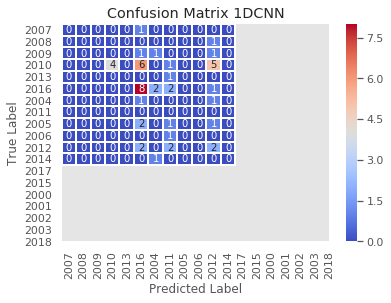

In [112]:
matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
cmn = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,cmap='coolwarm',linecolor='white',linewidths=1,xticklabels=LABELS, yticklabels=LABELS,
annot=True, fmt='d')
plt.title('Confusion Matrix 1DCNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("confusion_1DCNN.png")